<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/5-1%20%EA%B2%B0%EC%A0%95%20%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature selection을 위한 결정 트리

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 결정트리를 사용하여 feature selection하기
### feature_importances_ 이용

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [22]:
# 분석용 데이터 입력
stock_name = 'sec'
directory_for_ml = '../data/data_for_ml/'
fname = f'df_{stock_name}_sel.pkl'
f_name = directory_for_ml + fname
df = pd.read_pickle(f_name)

In [23]:
data = df.iloc[:240, :-5]
target = df.iloc[:240, -4]

In [24]:
plt_title2 = 'close_cr_5'

In [25]:
target.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 240 entries, 2022-01-11 to 2023-01-18
Series name: cr_05
Non-Null Count  Dtype
--------------  -----
240 non-null    int64
dtypes: int64(1)
memory usage: 3.8 KB


In [26]:
data.describe(include='all')

,retail,foreigner,institution,financial,invtrust,pension,privequity,bank,insurance,financeetc,...,kospi_cr,krw_cr,sox_cr,vix_cr,wti_cr,open,high,low,vol,weekday
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,-4.088960,-1.643905,-9.204509,-1.979598,-0.879832,1.437446,2.027869,16.771095,-1.952861,-3.110280,...,-0.085000,0.030167,-0.103417,0.102750,-0.030792,-0.000795,-0.000929,-0.000828,0.051242,2.083333
std,50.203231,16.689300,162.906738,22.548362,20.665609,25.553940,40.098488,298.445621,21.989742,26.006436,...,1.167759,0.661384,2.718119,6.653607,2.972412,0.015210,0.012852,0.013261,0.352367,1.375721
min,-759.655574,-170.161290,-2475.512605,-321.409524,-121.291667,-105.085714,-55.940789,-789.666667,-183.303030,-249.000000,...,-3.520000,-1.790000,-6.240000,-13.090000,-9.870000,-0.037139,-0.032841,-0.030498,-0.655365,0.000000
25%,-1.599927,-1.148336,-1.798263,-1.944746,-1.439958,-1.366766,-1.484406,-2.020421,-1.640175,-1.697913,...,-0.872500,-0.402500,-2.082500,-4.237500,-1.970000,-0.010528,-0.010114,-0.010280,-0.177909,1.000000
50%,-0.747867,-0.494372,-0.867549,-0.911871,-0.729971,-0.439956,-0.711318,-1.000000,-0.774582,-1.000000,...,-0.010000,0.090000,-0.195000,-1.310000,0.245000,-0.002812,-0.002231,-0.001576,-0.010794,2.000000
75%,0.169460,0.440255,0.109888,0.041446,0.306093,0.579879,0.260288,-0.243750,0.087066,0.018983,...,0.705000,0.472500,1.800000,3.442500,2.002500,0.007499,0.006612,0.006766,0.199856,3.000000
max,97.771324,84.403557,472.778281,108.223973,246.691489,347.889908,605.428571,4467.423453,183.050000,100.000000,...,2.740000,1.780000,10.210000,24.380000,8.350000,0.057361,0.037234,0.052124,2.001584,4.000000


In [27]:
train_input, test_input, train_target, test_target = train_test_split(data, target, random_state=42, test_size=0.2, stratify=target)

In [28]:
print(train_input.shape, test_input.shape)

(192, 35) (48, 35)


### 결정 트리는 스케일을 조정할 필요가 없음 <br>
선형함수를 훈련하는 알고리즘이 아니기 때문에 가중치를 계산하지 않고 진행해도 됨.

In [29]:
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [30]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [31]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [32]:
train_score = lr.score(train_scaled, train_target)
test_score = lr.score(test_scaled, test_target)
print('train score: {} \n test score: {}'.format(train_score, test_score))

train score: 0.9114583333333334 
 test score: 0.875


### 설명하기 쉬운 모델과 어려운 모델

In [33]:
lr.coef_, lr.intercept_

(array([[-0.21864836, -0.17686697,  0.16907207,  0.15833633,  0.44583252,
          0.07003516, -0.27418946, -0.18739167,  0.05881365,  0.07782055,
         -0.05502229, -0.14247782, -0.43268827,  0.2650471 , -0.35092614,
          0.02171049, -0.2266248 ,  0.4705285 , -0.00630165,  0.12223702,
         -0.0589718 ,  0.08363154, -0.07800325,  0.2290854 ,  0.13985456,
          1.14438479, -0.21621289,  0.78468367,  0.24367718, -0.04211575,
         -1.46639415,  1.48272325,  1.46771362,  0.20363243,  0.22183122]]),
 array([-1.81150045]))

In [36]:
df_sel = pd.DataFrame(lr.coef_.reshape(-1,1), index=data.columns, columns=['importance']).sort_values(by='importance', ascending=False)

In [39]:
df_sel[:10].index

Index(['high', 'low', 'kospi_cr', 'sox_cr', 'spx_f_cr', 'invtrust', 'dji_f_cr',
       'vix_cr', 'bond_usa_3m_cr', 'weekday'],
      dtype='object')

## 결정 트리 <br>
트리를 구분하는 기준은 gini 계수로 하고 있음

In [14]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [15]:
train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)
print('train score: {} \n test score: {}'.format(train_score, test_score))

train score: 1.0 
 test score: 0.7291666666666666


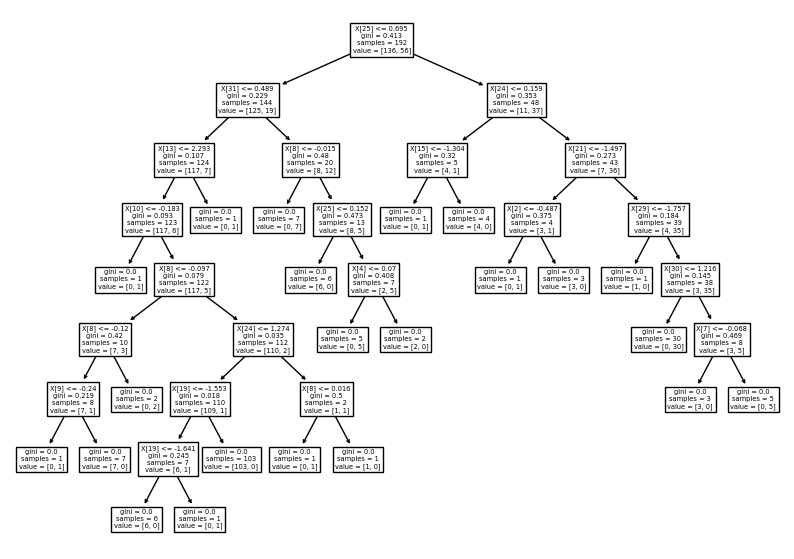

In [16]:
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show() # colab, notebook에서는 plt.show없이도 가능하나 그림 그리기 전의 데이터 print를 보이지 않게 함.

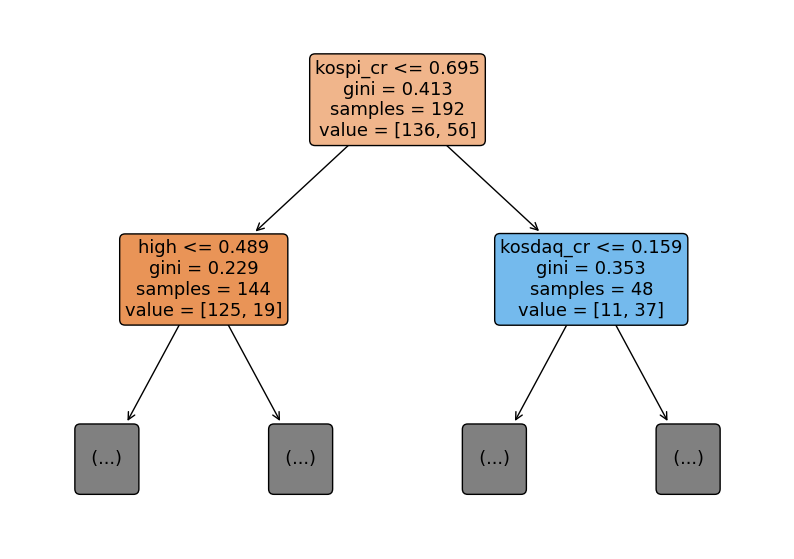

In [17]:
classes = data.columns
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, rounded=True, feature_names=classes)
plt.show()

In [18]:
classes = data.columns
classes

Index(['retail', 'foreigner', 'institution', 'financial', 'invtrust',
       'pension', 'privequity', 'bank', 'insurance', 'financeetc',
       'corporateetc', 'foreigneretc', 'dji_cr', 'dji_f_cr', 'ixic_cr',
       'ixic_f_cr', 'spx_cr', 'spx_f_cr', 'bond_kor_10_cr', 'bond_kor_2_cr',
       'dxy_cr', 'bond_usa_10_cr', 'bond_usa_2_cr', 'bond_usa_3m_cr',
       'kosdaq_cr', 'kospi_cr', 'krw_cr', 'sox_cr', 'vix_cr', 'wti_cr', 'open',
       'high', 'low', 'vol', 'weekday'],
      dtype='object')

### 가지치기 <br>
대표적인 과대적합 방지 방법 in  결정트리 방법 <br>
가중치를 학습하는 방법이 아니기 때문에 L1, L2 규제 등을 적용할 수 없음.

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

In [ ]:
train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)
print('train score: {} \n test score: {}'.format(train_score, test_score))

In [ ]:
classes = target
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, rounded=True, feature_names=classes)
plt.show()

위 그림에서 설탕 당도가 음수로 표시된 이유는 표준화 과정을 거쳤기 때문에 나타나는 현상으로 표준화 과정을 거치지 않으면 더 설명하기가 좋을 것임.

## 전처리 없이 수행

In [19]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [20]:
train_score = dt.score(train_input, train_target)
test_score = dt.score(test_input, test_target)
print('train score: {} \n test score: {}'.format(train_score, test_score))

train score: 0.9166666666666666 
 test score: 0.75


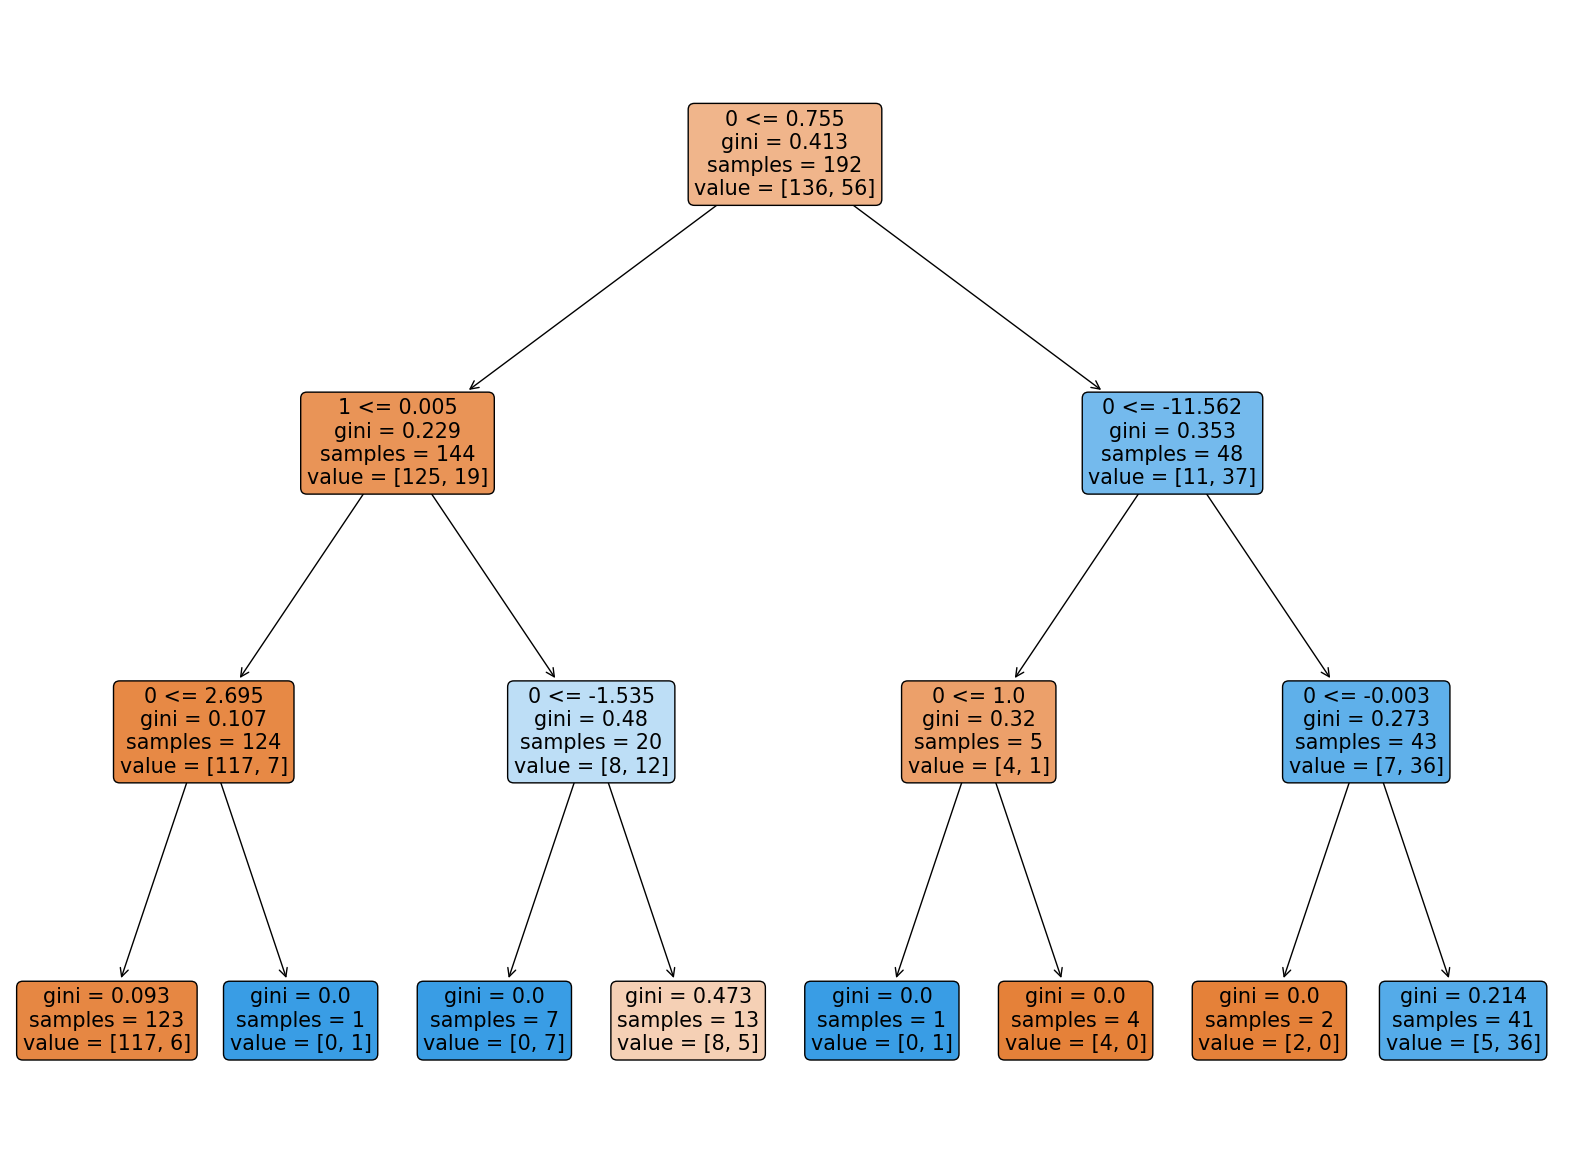

In [15]:
classes = target
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, rounded=True, feature_names=classes)
plt.show()

In [16]:
print(dt.feature_importances_) # 두번째 설탕이 중요도가 가장 높음. 트리 기반의 모델에서 제공함.

[0.         0.         0.         0.         0.         0.
 0.         0.         0.06504096 0.0686505  0.         0.
 0.         0.03387874 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.55467096 0.         0.         0.         0.
 0.         0.19206484 0.05549642 0.         0.03019759]


In [17]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06504096, 0.0686505 ,
       0.        , 0.        , 0.        , 0.03387874, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.55467096, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19206484, 0.05549642, 0.        , 0.03019759])

In [18]:
df_sel = pd.DataFrame(dt.feature_importances_, index=data.columns, columns=['importance']).sort_values(by='importance', ascending=False)

In [19]:
df_sel

,importance
kospi_cr,0.554671
high,0.192065
financeetc,0.068650
insurance,0.065041
low,0.055496
dji_f_cr,0.033879
weekday,0.030198
vix_cr,0.000000
wti_cr,0.000000
bond_kor_2_cr,0.000000


In [20]:
df_sel.index[:10]

Index(['kospi_cr', 'high', 'financeetc', 'insurance', 'low', 'dji_f_cr',
       'weekday', 'vix_cr', 'wti_cr', 'bond_kor_2_cr'],
      dtype='object')

## 확인문제

In [ ]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.001, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=data.columns)
plt.show()

In [ ]:
pd.DataFrame(dt.feature_importances_, index=data.columns, columns=['value']).sort_values(by='value', ascending=False)